🔍 What it does:
  *  Splits the document by sections (using numbered headings)
  * Analyzes tokens, words, and sentence counts per section
  * Performs NER (Named Entity Recognition) using spaCy
  * Generates Word Clouds for each section
  * Saves everything as a structured JSON (structured_policy1.json)





🔧 Module 1: Imports and Setup

In [1]:
import os, re, json
from collections import Counter
import spacy
import pandas as pd

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

nlp = spacy.load("en_core_web_sm")

📐Module 2: Text Utilities

In [2]:
def analyze_text(text):
    doc = nlp(text)
    return {
        "tokens": len(doc),
        "words": len([t for t in doc if t.is_alpha]),
        "sentences": len(list(doc.sents))
    }

def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

def load_json(path):
    with open(path, "r", encoding="utf-8") as f:
        return json.load(f)


✂️ Module 3: Section Splitter

In [3]:
def split_into_sections(text):
    text = re.sub(r'\n{2,}', '\n\n', text.strip())
    section_header_regex = re.compile(
        r"(?:^|\n)(?P<header>(?:\*{2,}|#{1,6})?\s*\d+(?:\.\d+)*\.?\s+.+?)\n(?=\S)",
        flags=re.MULTILINE
    )
    matches = list(section_header_regex.finditer(text))
    sections = []
    for i, match in enumerate(matches):
        start = match.end()
        end = matches[i+1].start() if i + 1 < len(matches) else len(text)
        title = match.group("header").strip(" *#")
        content = text[start:end].strip()
        if len(content.strip()) > 5:
            sections.append({"section": title, "content": content})
    return sections

📊 Module 4: EDA Visualizations + Entity Heatmap + Word coud





In [7]:
def plot_section_statistics(section_data):
    df_stats = pd.DataFrame([
        {
            "Section": sec.get("section", "Unknown"),
            "Tokens": sec.get("tokens", 0),
            "Words": sec.get("words", 0),
            "Sentences": sec.get("sentences", 0)
        }
        for sec in section_data
    ])

    df_stats.set_index("Section")[["Tokens", "Words", "Sentences"]].plot(
        kind="bar", figsize=(12, 6), title="Section-wise Token, Word, Sentence Counts"
    )
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    # Correlation Heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(df_stats[["Tokens", "Words", "Sentences"]].corr(), annot=True, cmap="coolwarm")
    plt.title("Feature Correlation Heatmap")
    plt.tight_layout()
    plt.show()

def generate_wordcloud(section_data):
  all_text = " ".join([sec["content"] for sec in section_data if sec["content"]])
  if len(all_text.split()) > 3:
      wc = WordCloud(width=1000, height=400, background_color='white').generate(all_text)
      plt.figure(figsize=(12, 5))
      plt.imshow(wc, interpolation="bilinear")
      plt.axis("off")
      plt.title("📌 WordCloud from All Sections")
      plt.tight_layout()
      plt.show()

🧠 Module 6: Save policy as json


In [5]:
def save_policy_as_json(file_path, output_json_name, output_dir):
    with open(file_path, "r", encoding="utf-8") as f:
        policy_text = f.read()
    sections = split_into_sections(policy_text)
    section_data = []
    entity_counter = Counter()
    for sec in sections:
        content = sec["content"]
        stats = analyze_text(content)
        entities = extract_entities(content)
        entity_counter.update([label for _, label in entities])
        section_data.append({
            "section": sec["section"],
            "content": content,
            **stats,
            "entities": entities
        })

    os.makedirs(output_dir, exist_ok=True)
    with open(os.path.join(output_dir, output_json_name), "w", encoding="utf-8") as f:
        json.dump(section_data, f, indent=2)

    print(f"✅ Saved {output_json_name} with {len(section_data)} sections.")
    return section_data  # return for optional inspection


 Module 7: Master Processor

In [9]:
# Save all three policy JSONs
save_policy_as_json("/content/drive/MyDrive/RAG/policy/Policy_1.txt", "structured_policy1.json", "/content/drive/MyDrive/RAG/json")
save_policy_as_json("/content/drive/MyDrive/RAG/policy/Policy_2.txt", "structured_policy2.json", "/content/drive/MyDrive/RAG/json")
save_policy_as_json("/content/drive/MyDrive/RAG/policy/Policy_3.txt", "structured_policy3.json", "/content/drive/MyDrive/RAG/json")

✅ Saved structured_policy1.json with 0 sections.
✅ Saved structured_policy2.json with 13 sections.
✅ Saved structured_policy3.json with 23 sections.


[{'section': '1.1 Purpose',
  'content': 'This document delineates the guiding principles and procedures for the governance of artificial intelligence (AI) model development, deployment, and monitoring within our organization. It aims to establish a robust framework that ensures our AI models operate effectively, ethically, and in compliance with all applicable regulations. The policy serves to safeguard our technological innovations, uphold our ethical commitments, and maintain stakeholder trust.',
  'tokens': 72,
  'words': 61,
  'sentences': 3,
  'entities': [('AI', 'ORG')]},
 {'section': '1.2 Scope',
  'content': 'The Model Governance Policy applies to all AI models developed, deployed, or managed by our company, across all departments and subsidiaries. It includes models at various stages of the lifecycle, from initial conception and development through to deployment and continuous monitoring.',
  'tokens': 47,
  'words': 41,
  'sentences': 2,
  'entities': [('AI', 'ORG')]},
 {'se

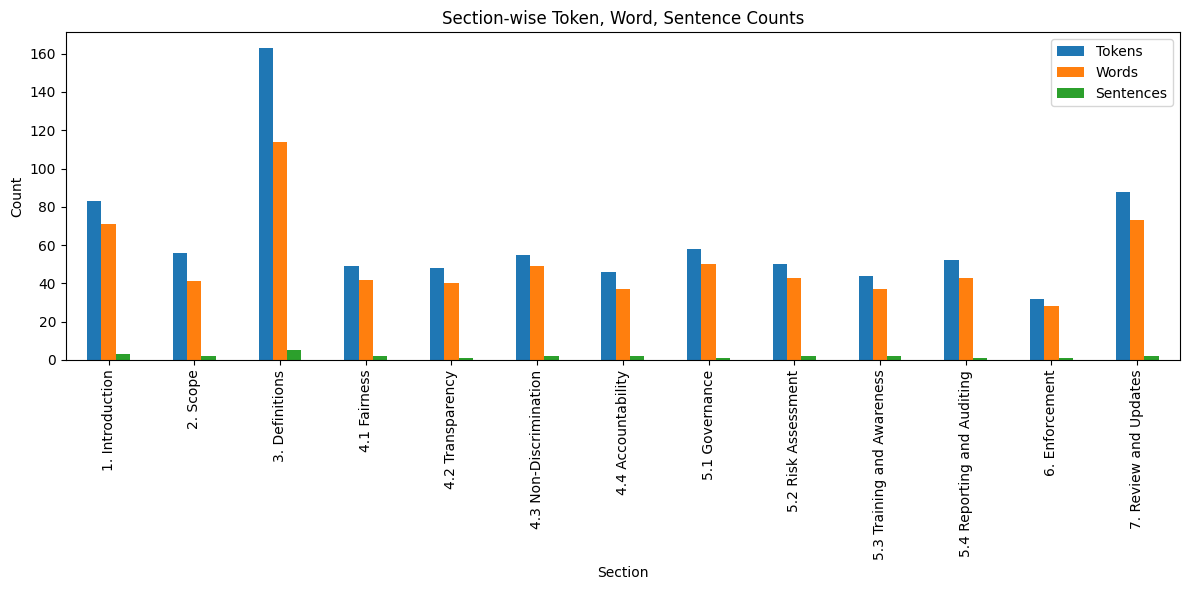

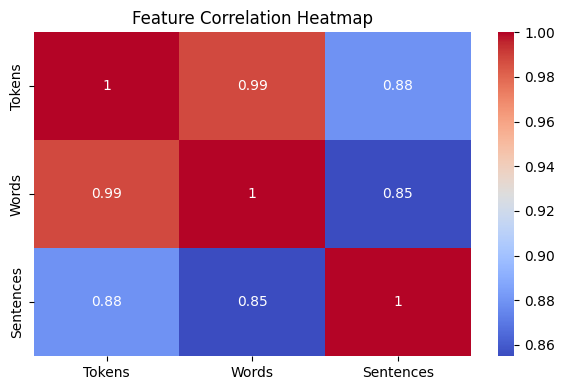

/tmp/ipython-input-7-1416377517.py:34: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


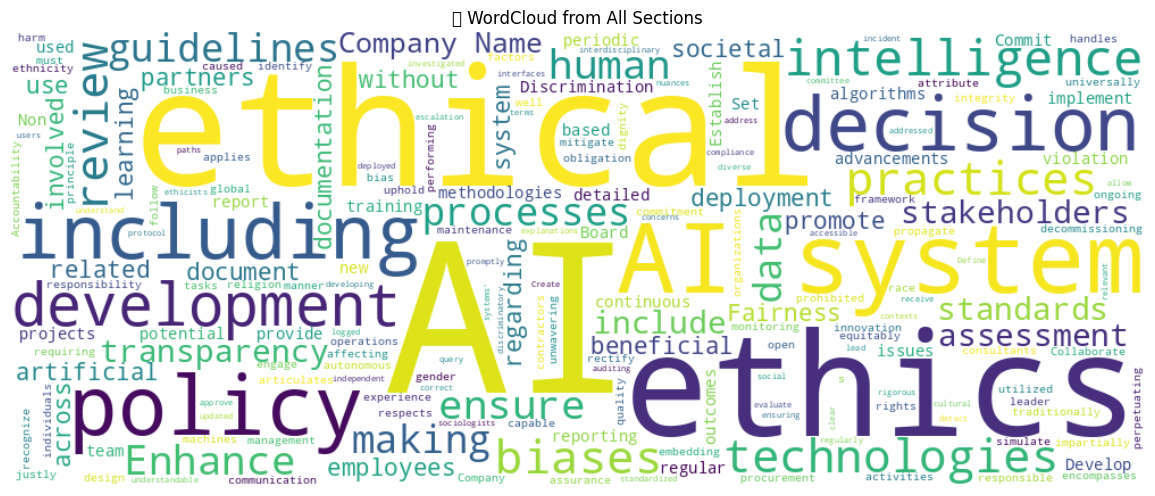

In [10]:
# Analyze just one of them
data = load_json("/content/drive/MyDrive/RAG/json/structured_policy2.json")
plot_section_statistics(data)
generate_wordcloud(data)